# PyTorch Linear Regression Project

😇 In this project, we are going to build a `PyTorch linear model`, that is trained with `custom generated linear-regression data`

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.1.0+cu118'

## Building a Custom Linear Regression Data
* Use the linear-regression formula `y = w*X + b` to create a dataset with X and y values

In [3]:
# set known parameters
weight = 0.3
bias = 0.9

# Create a linear dataset
START = 0
END = 1
STEP = 0.01

X = torch.arange(START, END, STEP).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [5]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

### Splitting into Train and Test set
* We are going to perform a 80-20% Train test split

In [6]:
train_size = int(len(X)*0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

### Visualizing our data

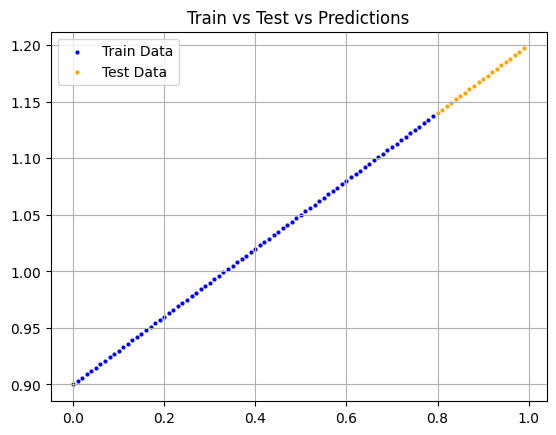

In [7]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.scatter(train_data, train_labels, s=4, color='blue', label='Train Data')
  plt.scatter(test_data, test_labels, s=4, color='orange', label='Test Data')
  if predictions != None:
    plt.scatter(test_data, predictions, s=4, color='green', label='predictions')
  plt.title('Train vs Test vs Predictions')
  plt.legend()
  plt.grid()
  plt.show()

plot_predictions()

## Build our PyTorch Linear model

In [8]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Create a Linear/Dense/Fully-connected/linear-transformation layer!
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, X:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

In [9]:
# Create a Linear Regression Model instance
torch.manual_seed(42)
model = LinearRegressionModel()

In [10]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

### Predict & Plot with our randomly initialized PyTorch Linear Model

In [12]:
with torch.inference_mode():
  y_pred = model(X_test)
y_pred[:10]

tensor([[1.4416],
        [1.4493],
        [1.4569],
        [1.4646],
        [1.4722],
        [1.4799],
        [1.4875],
        [1.4952],
        [1.5028],
        [1.5104]])

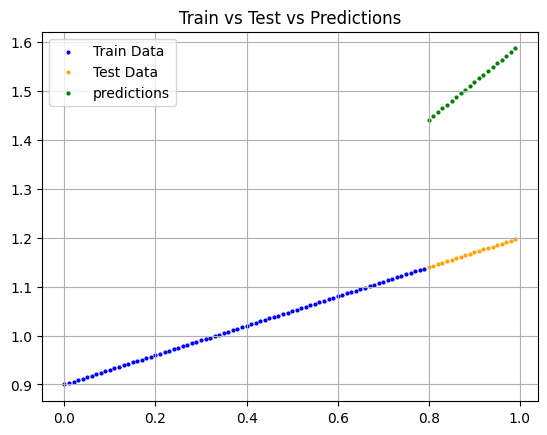

In [13]:
plot_predictions(predictions=y_pred)

## Training Our Pytorch Linear Model
* Change model training device to `cuda (GPU)`
* Create & Setup Loss Function and Optimizer for model
* Build Train and Test loop

In [14]:
torch.cuda.is_available()

True

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
next(model.parameters()).device

device(type='cpu')

In [17]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [18]:
# Create & setup Loss Function and Optimizer
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [19]:
# Build Train Loop
EPOCHS = 300

# loss curves tracking lists
epoch_list = []
training_loss = []
testing_loss = []


for epoch in range(EPOCHS):
  # set model to train mode
  model.train()

  # Forward Propagation
  y_preds = model(X_train.to(device))

  # Calculate loss
  train_loss = loss_fn(y_train.to(device), y_preds)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  if epoch % 20 == 0:

    # Calculate test loss
    model.eval()
    with torch.inference_mode():
      test_preds = model(X_test.to(device))
      test_loss = loss_fn(y_test.to(device), test_preds)

    epoch_list.append(epoch)
    training_loss.append(train_loss.cpu().detach().numpy())
    testing_loss.append(test_loss.cpu().detach().numpy())

    print(f'Epoch: {epoch} | Train MAE/Loss: {train_loss} | Test MAE/Loss: {test_loss}')
    print(f'Model Parameters: {model.state_dict()}')

Epoch: 0 | Train MAE/Loss: 0.1275613158941269 | Test MAE/Loss: 0.33650314807891846
Model Parameters: OrderedDict([('linear_layer.weight', tensor([[0.7609]], device='cuda:0')), ('linear_layer.bias', tensor([0.8240], device='cuda:0'))])
Epoch: 20 | Train MAE/Loss: 0.08187223970890045 | Test MAE/Loss: 0.21840262413024902
Model Parameters: OrderedDict([('linear_layer.weight', tensor([[0.7004]], device='cuda:0')), ('linear_layer.bias', tensor([0.7600], device='cuda:0'))])
Epoch: 40 | Train MAE/Loss: 0.07207288593053818 | Test MAE/Loss: 0.17458660900592804
Model Parameters: OrderedDict([('linear_layer.weight', tensor([[0.6582]], device='cuda:0')), ('linear_layer.bias', tensor([0.7540], device='cuda:0'))])
Epoch: 60 | Train MAE/Loss: 0.06507988274097443 | Test MAE/Loss: 0.15310420095920563
Model Parameters: OrderedDict([('linear_layer.weight', tensor([[0.6225]], device='cuda:0')), ('linear_layer.bias', tensor([0.7645], device='cuda:0'))])
Epoch: 80 | Train MAE/Loss: 0.05822876840829849 | Test

In [20]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])

In [21]:
weight, bias

(0.3, 0.9)

In [22]:
with torch.inference_mode():
  y_preds = model(X_test.to(device))
y_preds[:10]

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605]], device='cuda:0')

In [23]:
print(f'Test loss: {loss_fn(y_test, y_preds.cpu())}')

Test loss: 0.006470995955169201


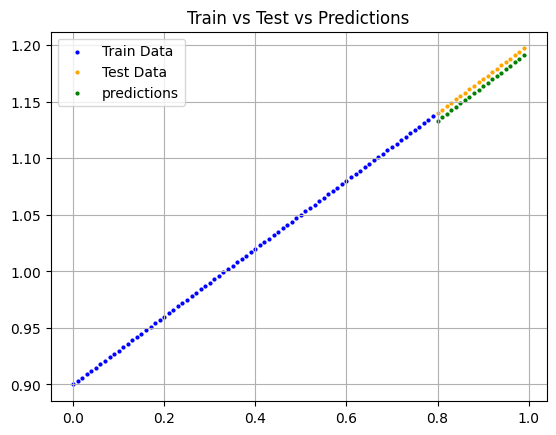

In [24]:
plot_predictions(predictions=y_preds.cpu())

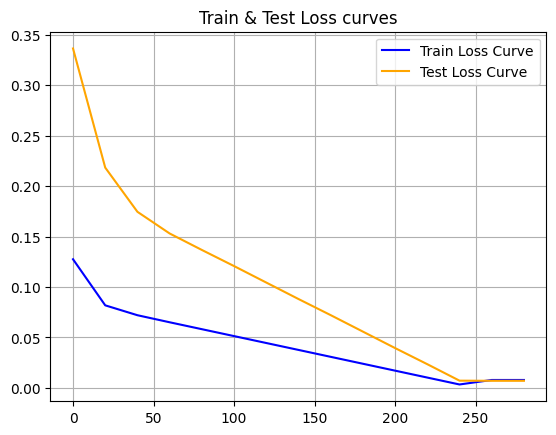

In [25]:
plt.plot(epoch_list, training_loss, color='blue', label='Train Loss Curve')
plt.plot(epoch_list, testing_loss, color='orange', label='Test Loss Curve')
plt.grid()
plt.legend()
plt.title('Train & Test Loss curves')
plt.show()

## Saving and Re-loading our model!

In [26]:
MODEL_SAVE_PATH = 'pytorch_linear_model.pth'
torch.save(model.state_dict(), f=MODEL_SAVE_PATH)

In [27]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3028]])),
             ('linear_layer.bias', tensor([0.8910]))])

In [29]:
loaded_model.to(device)
with torch.inference_mode():
  loaded_preds = loaded_model(X_test.to(device))
loaded_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')